Chapter 25

# 状态向量连续变化
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码实现了一个关于概率转移矩阵的可视化，其核心是利用线性代数和图形绘制展示状态向量在每一步转移后的变化情况。首先，定义了一个状态转移矩阵$T = \begin{pmatrix} 0.7 & 0.2 \\ 0.3 & 0.8 \end{pmatrix}$，它描述了在两个状态之间的转移概率。接下来，状态向量$\pi_i$代表了在某个时间点每种状态的概率分布。

在初始化过程中，生成了一个二维网格，用于绘制单位圆和参考线。这些参考线有助于更好地理解概率的变化。

对于每个初始状态概率分布，代码通过一个循环计算在多个步骤之后状态向量的变化。在每一步中，代码使用公式$$\pi_{i+1} = T \cdot \pi_i$$来更新状态向量。这一过程通过归一化和向量的可视化进行呈现，每个状态向量的变化都以不同颜色表示，展示了其在二维空间中的演变。

具体而言，向量的起点始终是原点$(0,0)$，而终点则根据当前的状态向量决定。每次迭代结束后，状态向量都通过乘以转移矩阵更新，直观展示了其在不同时间点的演化。

最终，整个过程通过可视化展示了在状态转移下，系统是如何从初始概率分布逐步演化到新的状态的，这种方式使得我们可以更清晰地理解马尔可夫链的动态特性及其在现实世界中的应用。

## 导入必要的库

In [1]:
import numpy as np  # 导入NumPy库，用于矩阵和数组计算
import seaborn as sns  # 导入Seaborn库，用于绘制热图等可视化
import matplotlib.pyplot as plt  # 导入Matplotlib库，用于绘图

## 定义绘制向量的函数

In [2]:

def draw_vector(vector, RBG, ax):  # 定义绘制向量的函数，输入参数为向量、颜色和坐标轴
    ax.quiver(0, 0, vector[0], vector[1],  # 从原点绘制向量到目标位置
              angles='xy',  # 设置角度为笛卡尔坐标系
              scale_units='xy',  # 使用笛卡尔单位比例
              scale=1,  # 设置比例为1，表示不缩放
              color=RBG)  # 设置向量的颜色

## 定义转移矩阵

In [3]:
T = np.matrix([[0.7, 0.2],  # 定义转移矩阵T，表示从一个状态到另一个状态的转移概率
               [0.3, 0.8]])  # 第一行表示状态1的转移概率，第二行表示状态2的转移概率

## 定义最大值和最小值

In [4]:
all_max = 1  # 定义热图和向量图的最大值
all_min = 0  # 定义热图和向量图的最小值

## 创建网格坐标

In [5]:
x1 = np.linspace(-1.1, 1.1, num=201)  # 定义x1的取值范围，范围为[-1.1, 1.1]，共201个点
x2 = x1  # 设置x2与x1相同，确保网格为方形
xx1, xx2 = np.meshgrid(x1, x2)  # 使用网格生成器生成坐标网格
zz = ((np.abs((xx1))**2) + (np.abs((xx2))**2))**(1./2)  # 计算网格中每个点的模长

## 创建状态概率分布数组

In [6]:
pi_array = np.vstack((np.linspace(1, 0, 11), 1 - np.linspace(1, 0, 11)))  # 生成多个状态概率分布，第一行为状态1概率，第二行为状态2概率
pi_array = np.matrix(pi_array)  # 将数组转换为矩阵格式，便于矩阵运算
num_steps = 12  # 定义时间步数，用于模拟多个时间步的状态转移

## 定义颜色渐变

In [7]:
colors = plt.cm.rainbow(np.linspace(0, 1, num_steps + 1))  # 生成颜色渐变数组，每个时间步对应一种颜色

## 遍历初始状态概率分布

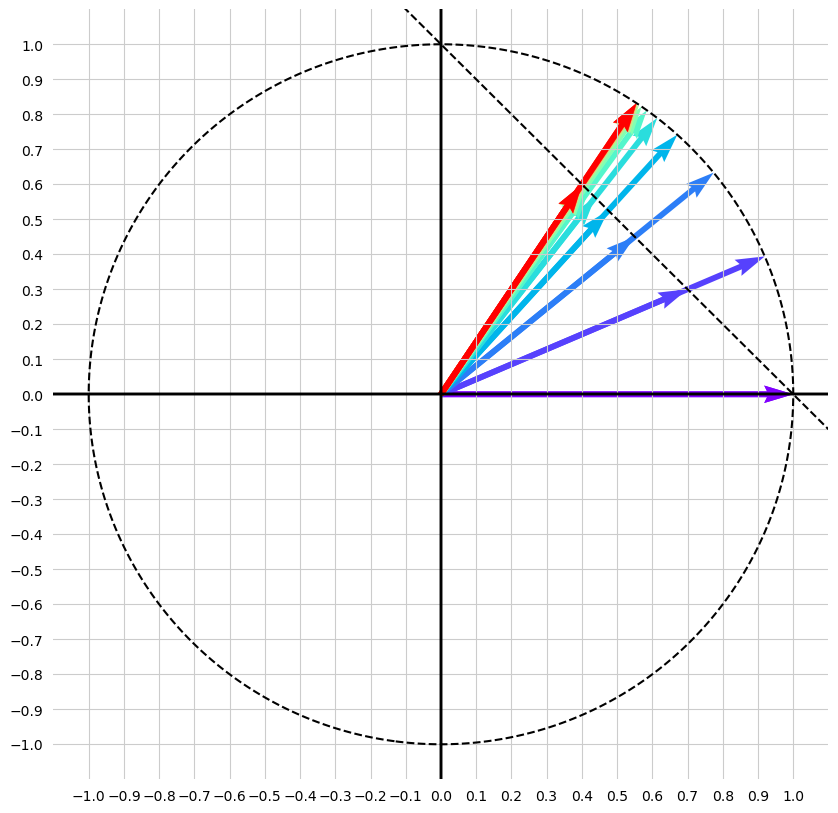

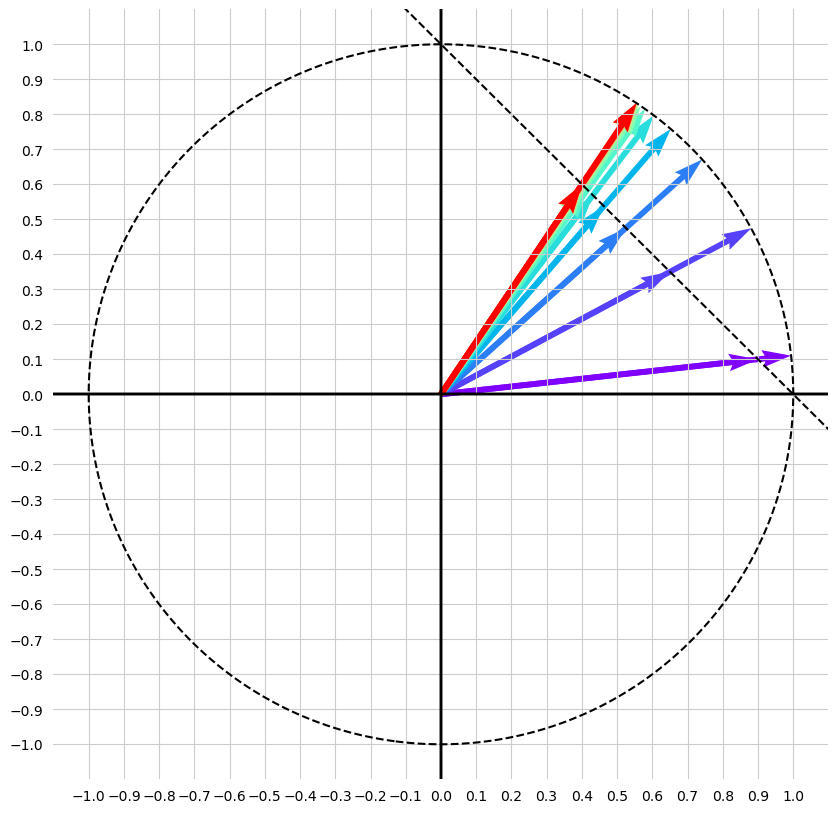

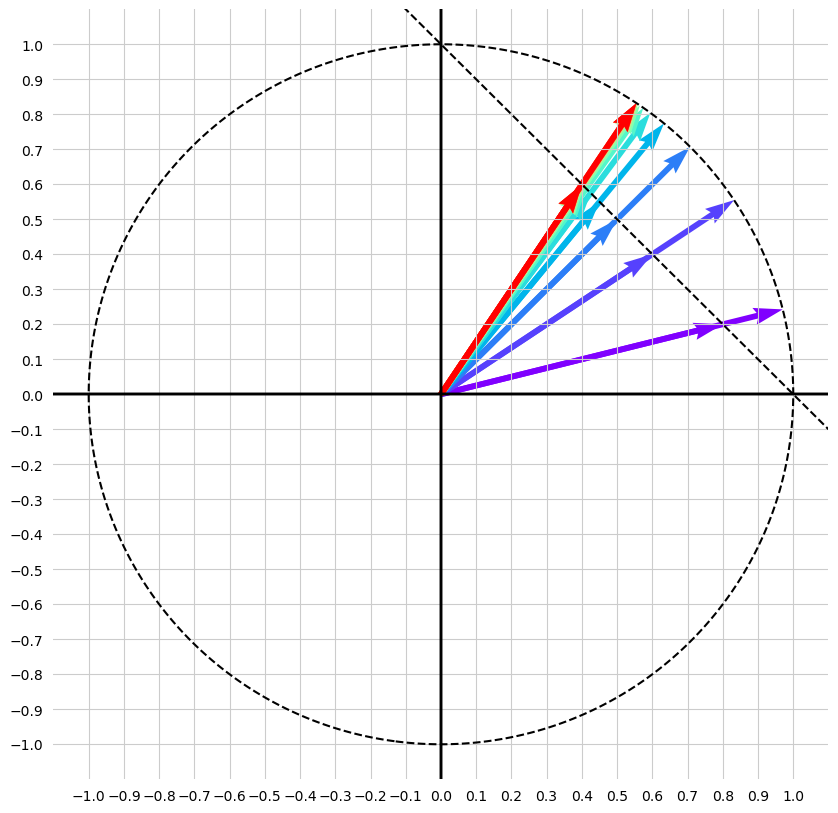

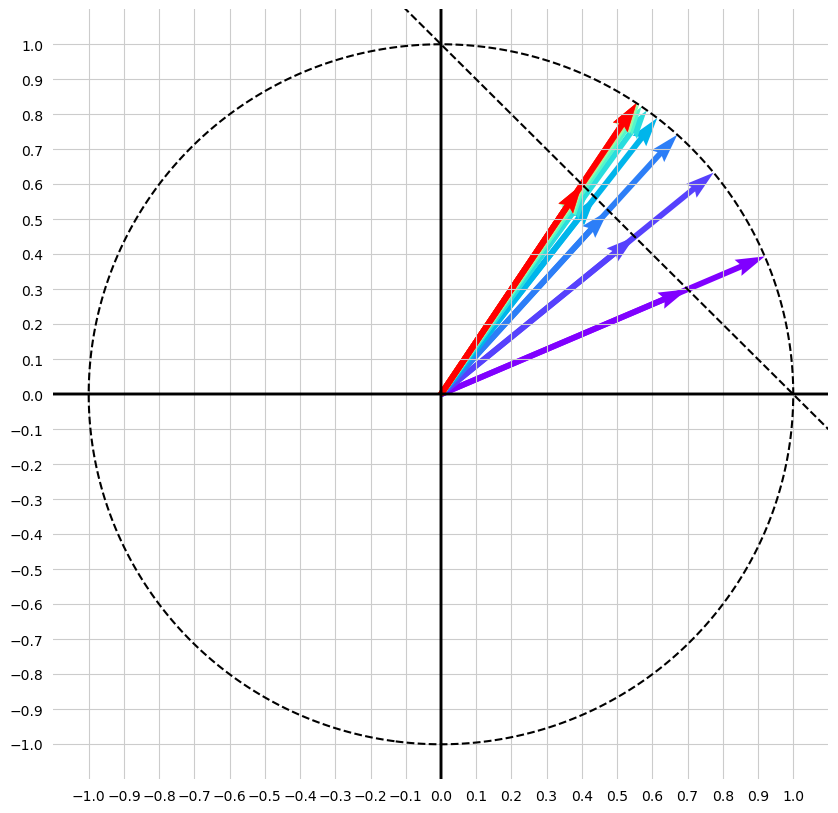

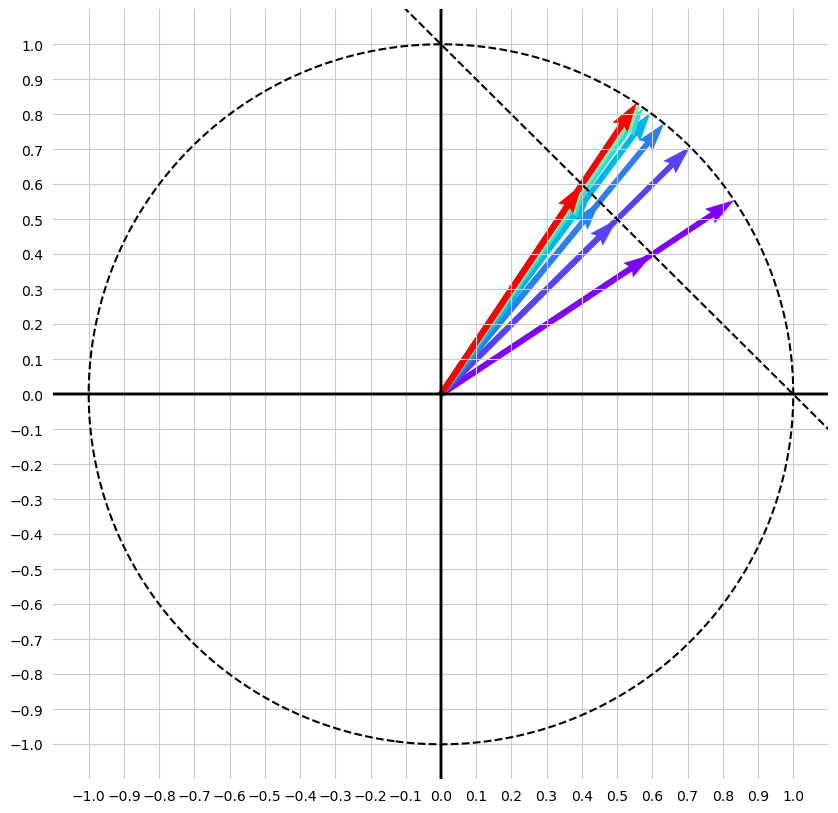

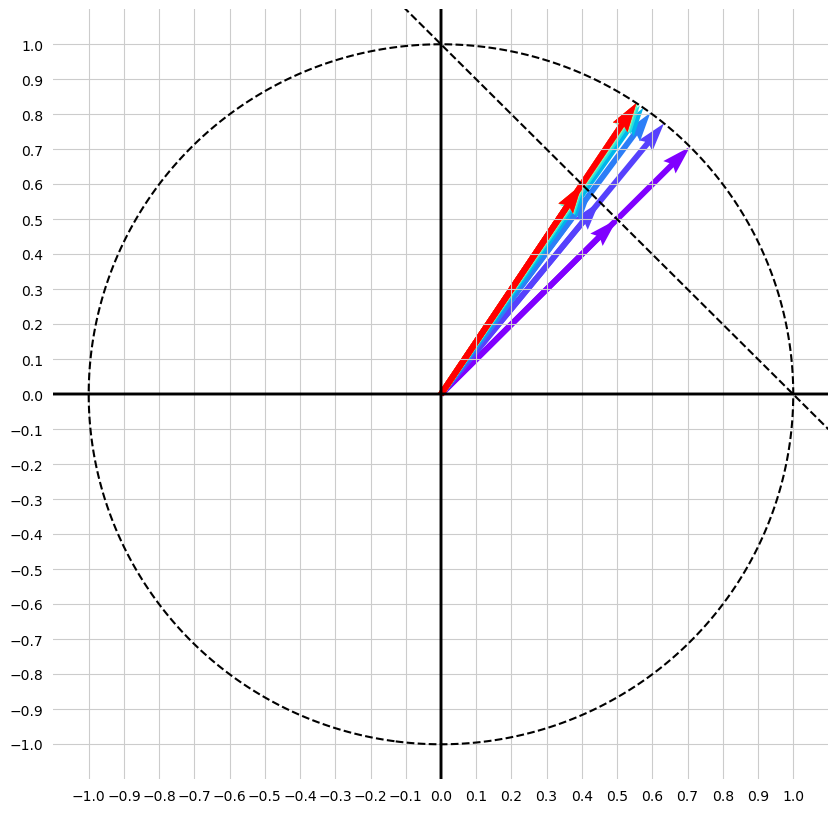

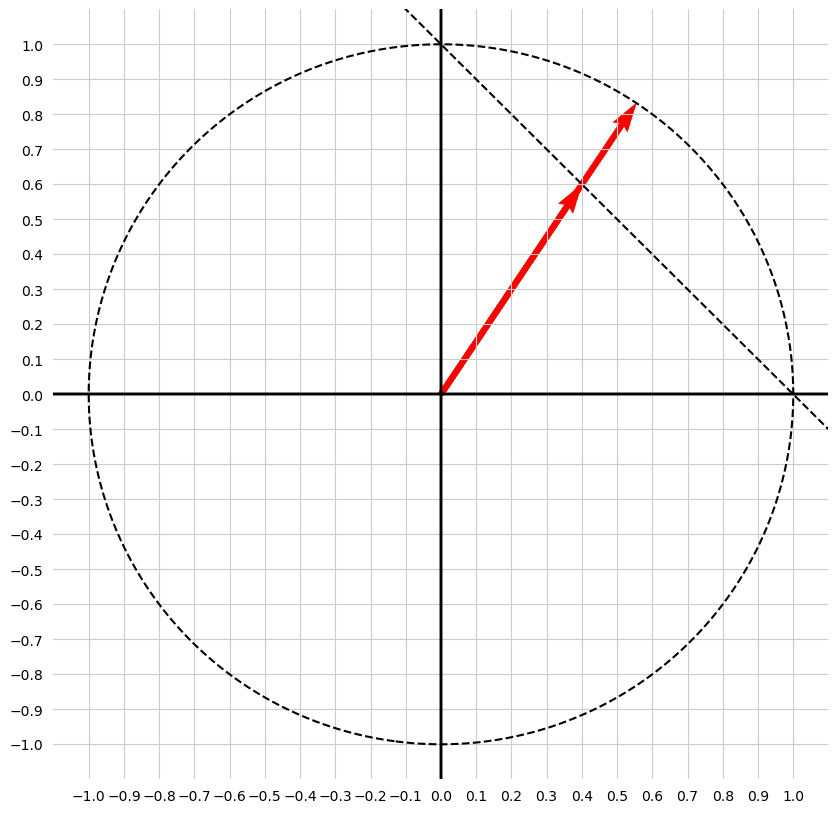

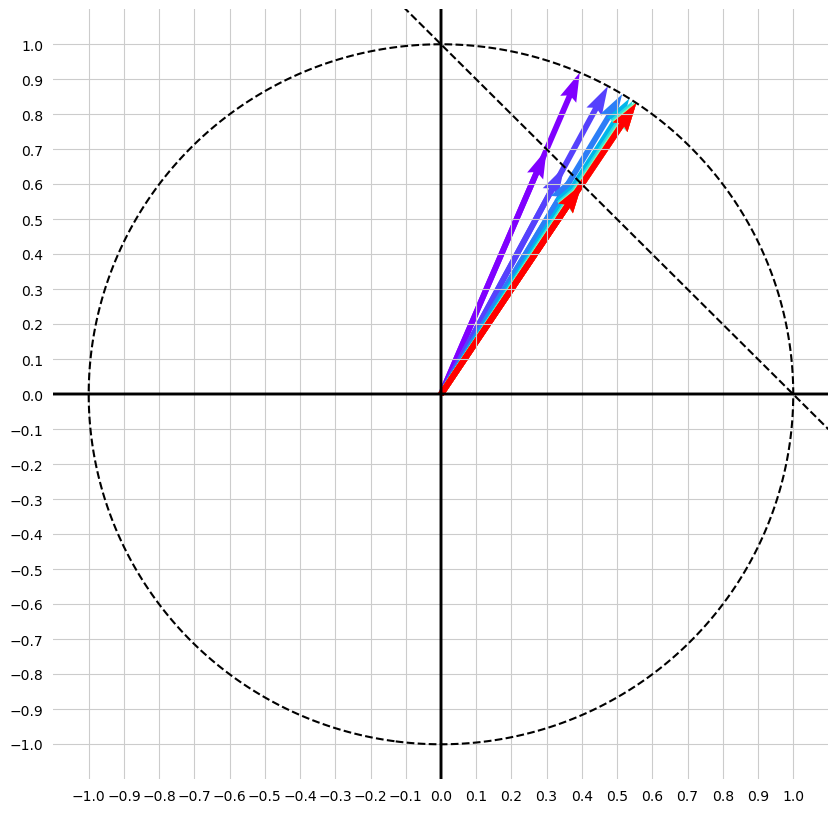

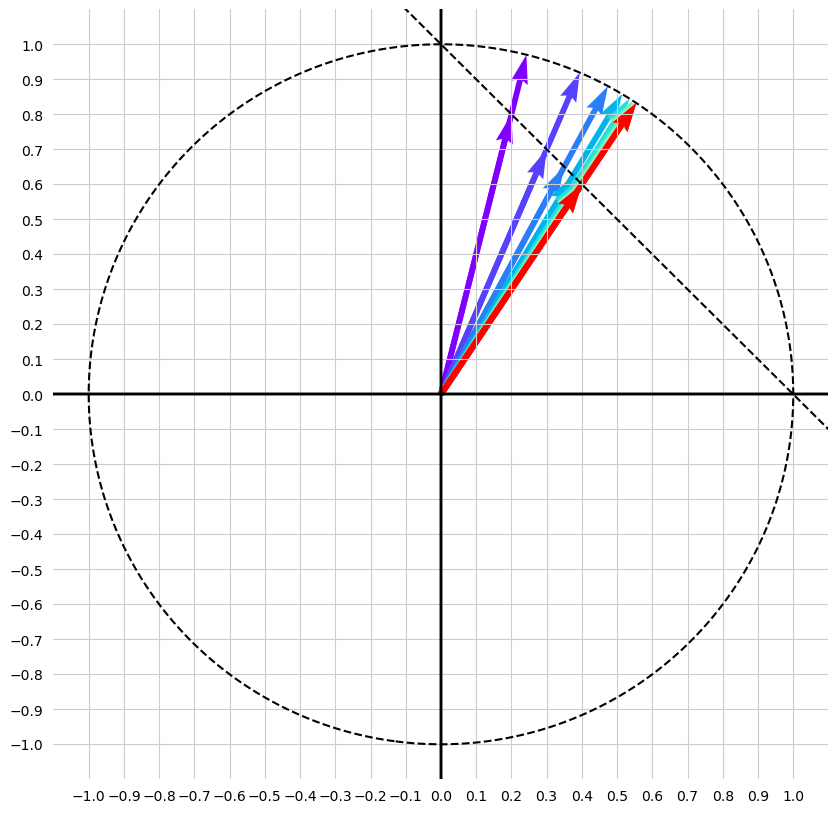

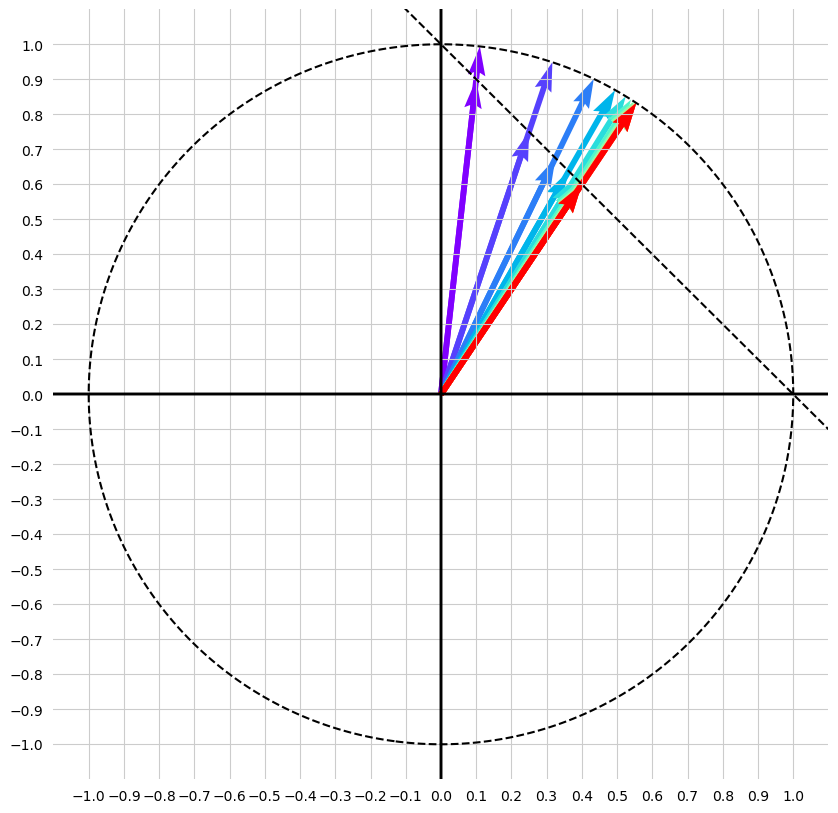

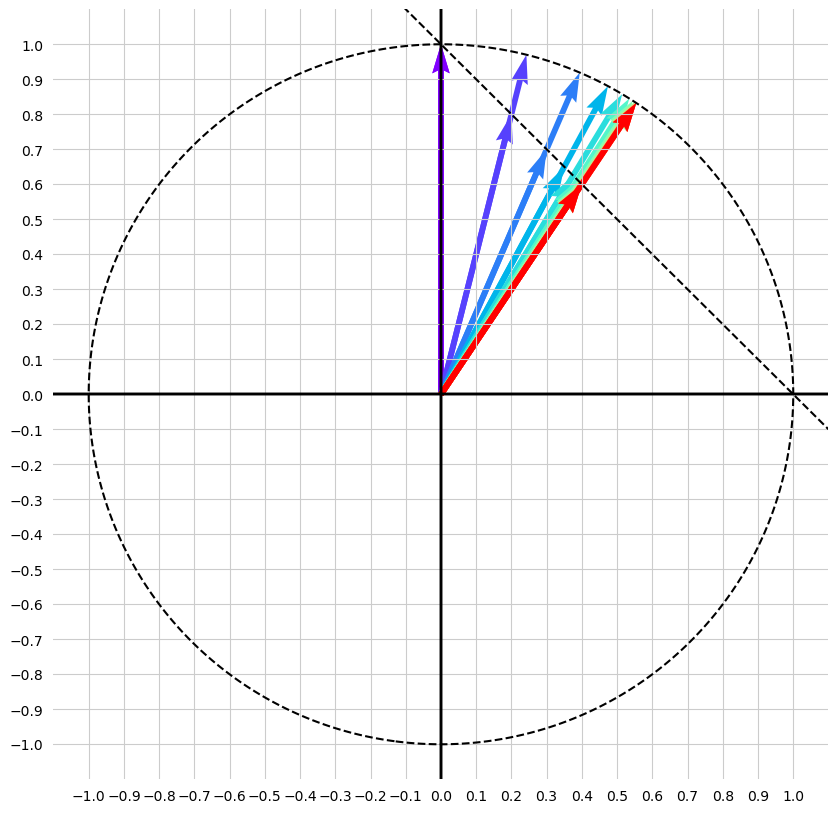

In [8]:
for ini in np.arange(0, np.shape(pi_array)[1]):  # 遍历所有的初始状态分布
    pi = pi_array[:, ini]  # 获取当前初始状态概率分布
    fig, ax = plt.subplots(figsize=(10, 10))  # 创建新的图形和坐标轴
    
    # 绘制参考线
    plt.plot(x1, 1 - x1, color='k',  # 绘制参考线y=1-x
             linestyle='--')  # 设置参考线的样式为虚线

    # 绘制单位圆
    plt.contour(xx1, xx2, zz, levels=[1],  # 绘制模长为1的等高线，即单位圆
                colors='k', linestyles=['--'])  # 设置等高线的颜色为黑色，样式为虚线

    # 遍历每个时间步
    for i in np.arange(0, num_steps + 1):  # 遍历从0到num_steps的时间步
        draw_vector(pi / np.linalg.norm(pi), colors[i], ax)  # 绘制归一化向量，用渐变颜色表示时间步
        draw_vector(pi, colors[i], ax)  # 绘制原始向量，用相同颜色表示时间步
        ax.tick_params(left=False, bottom=False)  # 隐藏坐标轴的刻度线
        ax.set_xlim(-1.1, 1.1)  # 设置x轴的范围为[-1.1, 1.1]
        ax.set_ylim(-1.1, 1.1)  # 设置y轴的范围为[-1.1, 1.1]
        ax.axvline(x=0, color='k')  # 绘制y轴
        ax.axhline(y=0, color='k')  # 绘制x轴
        ax.spines['top'].set_visible(False)  # 隐藏上边框
        ax.spines['right'].set_visible(False)  # 隐藏右边框
        ax.spines['bottom'].set_visible(False)  # 隐藏下边框
        ax.spines['left'].set_visible(False)  # 隐藏左边框
        ax.grid(color=[0.8, 0.8, 0.8])  # 设置网格颜色为灰色
        plt.xticks(np.linspace(-1, 1, 21))  # 设置x轴刻度，范围为[-1, 1]，共21个刻度
        plt.yticks(np.linspace(-1, 1, 21))  # 设置y轴刻度，范围为[-1, 1]，共21个刻度
        pi = T @ pi  # 使用转移矩阵T更新状态概率分布